In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("/Users/satyavijayram/Desktop/Restaurant_Reviews.tsv",delimiter="\t",quoting=3)

In [2]:
data.shape

(1000, 2)

In [3]:
data.columns

Index(['Review', 'Liked'], dtype='object')

In [4]:
data.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

In [5]:
import nltk
import re
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Error loading stopwords: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>


In [6]:
corpus = []
for i in range(0,1000):
    review = re.sub(pattern='[^a-zA-Z]',repl=' ', string=data['Review'][i])
    review = review.lower()
    review_words = review.split()
    review_words = [word for word in review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    #review = [ps.stem(word) for word in review_words]
    review = ''.join(review)
    corpus.append(review)

In [7]:
corpus[:1500]

['wow    loved this place ',
 'crust is not good ',
 'not tasty and the texture was just nasty ',
 'stopped by during the late may bank holiday off rick steve recommendation and loved it ',
 'the selection on the menu was great and so were the prices ',
 'now i am getting angry and i want my damn pho ',
 'honeslty it didn t taste that fresh  ',
 'the potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer ',
 'the fries were great too ',
 'a great touch ',
 'service was very prompt ',
 'would not go back ',
 'the cashier had no care what so ever on what i had to say it still ended up being wayyy overpriced ',
 'i tried the cape cod ravoli  chicken  with cranberry   mmmm ',
 'i was disgusted because i was pretty sure that was human hair ',
 'i was shocked because no signs indicate cash only ',
 'highly recommended ',
 'waitress was a little slow in service ',
 'this place is not worth your time  let alone vegas ',
 'did not like at all 

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
x = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 1].values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 0)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

In [11]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [12]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1])

In [13]:
from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_score

from sklearn.metrics import recall_score

score1 = accuracy_score(y_test,y_pred)

score2 = precision_score (y_test,y_pred)

score3 = recall_score (y_test,y_pred)

print("-----------Scores---------------")

print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}%".format(round(score2*100,2)))
print("Recall score is: {}".format(round(score3*100,2)))

-----------Scores---------------
Accuracy score is: 81.5%
Precision score is: 82.35%
Recall score is: 81.55


In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[79, 18],
       [19, 84]])

Text(95.72222222222221, 0.5, 'Actual values')

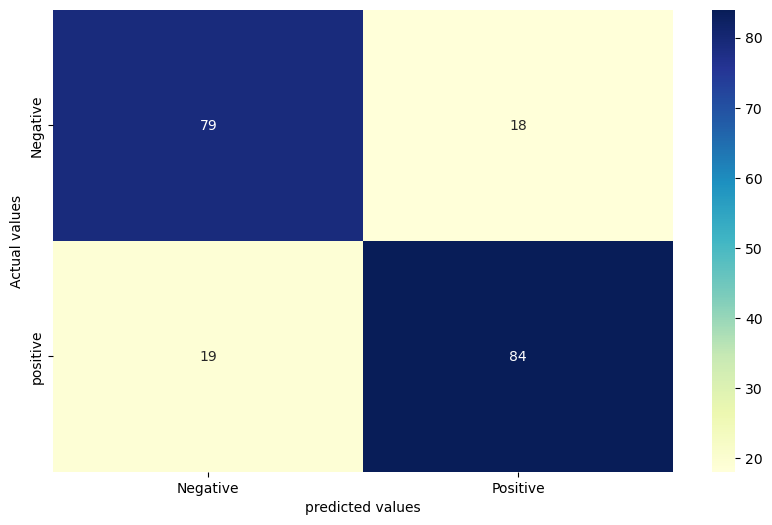

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True,cmap="YlGnBu",xticklabels=['Negative','Positive'],yticklabels=['Negative','positive'])
plt.xlabel('predicted values')
plt.ylabel('Actual values')



In [16]:
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
    temp_classifier = MultinomialNB(alpha=1)
    temp_classifier.fit(X_train,y_train)
    temp_y_pred = temp_classifier.predict(X_test)
    score = accuracy_score(y_test,temp_y_pred)
    print("Accuracy score for alpha={} is: {}%".format(round(i,1),round(score*100,2)))
    if score > best_accuracy:
        best_accuracy = score
        alpha_val = i
print(".......................................................")
print("The best accuracy is {}% with alpha value as {}".format(round(best_accuracy*100,2),round(alpha_val,1)))


Accuracy score for alpha=0.1 is: 81.5%
Accuracy score for alpha=0.2 is: 81.5%
Accuracy score for alpha=0.3 is: 81.5%
Accuracy score for alpha=0.4 is: 81.5%
Accuracy score for alpha=0.5 is: 81.5%
Accuracy score for alpha=0.6 is: 81.5%
Accuracy score for alpha=0.7 is: 81.5%
Accuracy score for alpha=0.8 is: 81.5%
Accuracy score for alpha=0.9 is: 81.5%
Accuracy score for alpha=1.0 is: 81.5%
.......................................................
The best accuracy is 81.5% with alpha value as 0.1


In [17]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train,y_train)

MultinomialNB(alpha=0.1)

In [18]:
def predict_sentiment(sample_review):
    sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_review)
    sample_review = sample_review.lower()
    sample_review_words = sample_review.split()
    sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    #final_review = [ps.stem(word) for word in sample_review_words]
    final_review = ''.join(sample_review)
    temp = cv.transform([final_review]).toarray()
    return classifier.predict(temp)

In [19]:
sample_review = "The food is really bad."
if predict_sentiment(sample_review):
    print("This is a Positive review")
else:
    print("this is a Negative review")

this is a Negative review


In [20]:
sample_review = "The food was absolutely wonderful,from preparation to presentation,very pleasing."
if predict_sentiment(sample_review):
    print("This is a Posivitive review")
else:
    print("this is a Negative review")

This is a Posivitive review


In [21]:
sample_review = "The food is really good."
if predict_sentiment(sample_review):
    print("This is a Posivitive review")
else:
    print("this is a Negative revieww")

This is a Posivitive review


# Logistic Regression  Algorithm

In [22]:
from sklearn.linear_model import LogisticRegression

#create an object for regression model

ModelLR = LogisticRegression()

#train the model with dataset training
ModelLR.fit(X_train,y_train)

#predict the model with test dataset

y_predlr = ModelLR.predict(X_test)
y_pred_problr = ModelLR.predict_proba(X_test)

In [23]:
y_predlr

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1])

In [47]:
from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_score

from sklearn.metrics import recall_score

score1 = accuracy_score(y_test,y_predlr)

score2 = precision_score (y_test,y_predlr)

score3 = recall_score (y_test,y_predlr)

print("-----------Scores---------------")

print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}%".format(round(score2*100,2)))
print("Recall score is: {}".format(round(score3*100,2)))

-----------Scores---------------
Accuracy score is: 65.5%
Precision score is: 69.32%
Recall score is: 59.22


In [27]:
from sklearn.metrics import confusion_matrix
cmlr = confusion_matrix(y_test, y_predlr)
cmlr

array([[82, 15],
       [20, 83]])

Text(95.72222222222221, 0.5, 'Actual values')

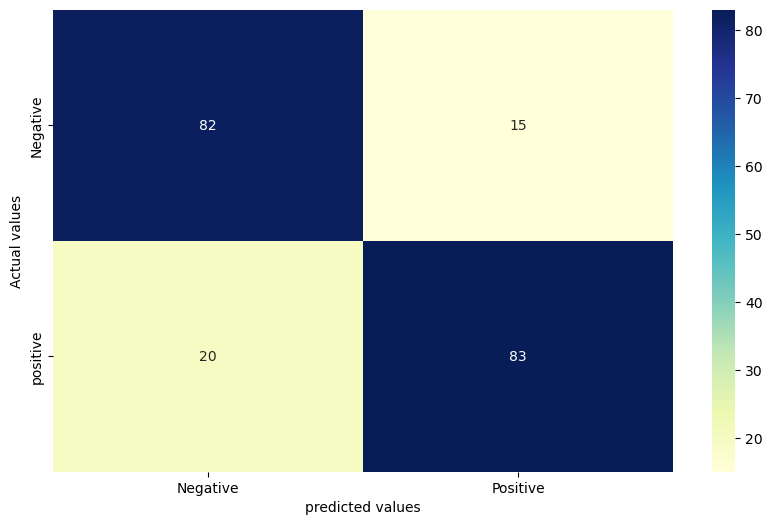

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize = (10,6))
sns.heatmap(cmlr, annot=True,cmap="YlGnBu",xticklabels=['Negative','Positive'],yticklabels=['Negative','positive'])
plt.xlabel('predicted values')
plt.ylabel('Actual values')


In [30]:
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
    temp_classifier = LogisticRegression()
    temp_classifier.fit(X_train,y_train)
    temp_y_pred = temp_classifier.predict(X_test)
    score = accuracy_score(y_test,temp_y_pred)
    print("Accuracy score for alpha={} is: {}%".format(round(i,1),round(score*100,2)))
    if score > best_accuracy:
        best_accuracy = score
        alpha_val = i
print(".......................................................")
print("The best accuracy is {}% with alpha value as {}".format(round(best_accuracy*100,2),round(alpha_val,1)))


Accuracy score for alpha=0.1 is: 82.5%
Accuracy score for alpha=0.2 is: 82.5%
Accuracy score for alpha=0.3 is: 82.5%
Accuracy score for alpha=0.4 is: 82.5%
Accuracy score for alpha=0.5 is: 82.5%
Accuracy score for alpha=0.6 is: 82.5%
Accuracy score for alpha=0.7 is: 82.5%
Accuracy score for alpha=0.8 is: 82.5%
Accuracy score for alpha=0.9 is: 82.5%
Accuracy score for alpha=1.0 is: 82.5%
.......................................................
The best accuracy is 82.5% with alpha value as 0.1


In [32]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [35]:
def predict_sentimentlr(sample_review):
    sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_review)
    sample_review = sample_review.lower()
    sample_review_words = sample_review.split()
    sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    #final_review = [ps.stem(word) for word in sample_review_words]
    final_review = ''.join(sample_review)
    temp = cv.transform([final_review]).toarray()
    return lr.predict(temp)

In [36]:
sample_review = "The food is really bad."
if predict_sentimentlr(sample_review):
    print("This is a Positive review")
else:
    print("this is a Negative review")

this is a Negative review


In [39]:
sample_review = "The food is really good."
if predict_sentimentlr(sample_review):
    print("This is a Positive review")
else:
    print("this is a Negative review")

This is a Positive review


In [41]:
from sklearn.tree import DecisionTreeClassifier
ModelDC = DecisionTreeClassifier()
#train the model with dataset training
ModelDC.fit(X_train,y_train)

#predict the model with test dataset

y_predDC = ModelDC.predict(X_test)
y_pred_probDC = ModelLR.predict_proba(X_test)

In [42]:
y_predDC

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1])

In [44]:
from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_score

from sklearn.metrics import recall_score

score1 = accuracy_score(y_test,y_predDC)

score2 = precision_score (y_test,y_predDC)

score3 = recall_score (y_test,y_predDC)

print("-----------Scores---------------")

print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}%".format(round(score2*100,2)))
print("Recall score is: {}".format(round(score3*100,2)))

-----------Scores---------------
Accuracy score is: 67.0%
Precision score is: 72.84%
Recall score is: 57.28


In [49]:
from sklearn.metrics import confusion_matrix
cmDC = confusion_matrix(y_test, y_predDC)
cmDC

array([[75, 22],
       [44, 59]])

Text(95.72222222222221, 0.5, 'Actual values')

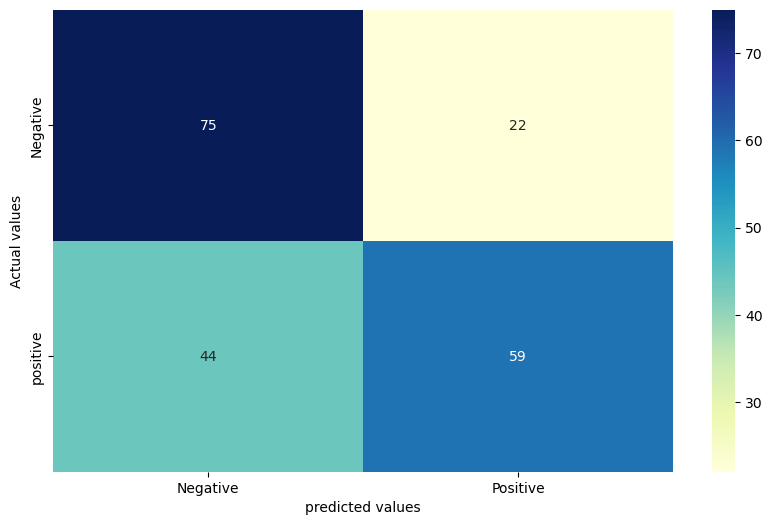

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize = (10,6))
sns.heatmap(cmDC, annot=True,cmap="YlGnBu",xticklabels=['Negative','Positive'],yticklabels=['Negative','positive'])
plt.xlabel('predicted values')
plt.ylabel('Actual values')


In [51]:
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
    temp_classifier = DecisionTreeClassifier()
    temp_classifier.fit(X_train,y_train)
    temp_y_pred = temp_classifier.predict(X_test)
    score = accuracy_score(y_test,temp_y_pred)
    print("Accuracy score for alpha={} is: {}%".format(round(i,1),round(score*100,2)))
    if score > best_accuracy:
        best_accuracy = score
        alpha_val = i
print(".......................................................")
print("The best accuracy is {}% with alpha value as {}".format(round(best_accuracy*100,2),round(alpha_val,1)))


Accuracy score for alpha=0.1 is: 66.0%
Accuracy score for alpha=0.2 is: 67.0%
Accuracy score for alpha=0.3 is: 67.5%
Accuracy score for alpha=0.4 is: 68.5%
Accuracy score for alpha=0.5 is: 68.0%
Accuracy score for alpha=0.6 is: 68.5%
Accuracy score for alpha=0.7 is: 66.0%
Accuracy score for alpha=0.8 is: 63.0%
Accuracy score for alpha=0.9 is: 68.0%
Accuracy score for alpha=1.0 is: 65.0%
.......................................................
The best accuracy is 68.5% with alpha value as 0.4


In [55]:
DC = DecisionTreeClassifier()
DC.fit(X_train,y_train)

DecisionTreeClassifier()

In [56]:
def predict_sentimentDC(sample_review):
    sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_review)
    sample_review = sample_review.lower()
    sample_review_words = sample_review.split()
    sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    #final_review = [ps.stem(word) for word in sample_review_words]
    final_review = ''.join(sample_review)
    temp = cv.transform([final_review]).toarray()
    return lr.predict(temp)

In [57]:
sample_review = "The food is really bad."
if predict_sentimentDC(sample_review):
    print("This is a Positive review")
else:
    print("this is a Negative review")

this is a Negative review


In [59]:
sample_review = "The food is really good."
if predict_sentimentDC(sample_review):
    print("This is a Positive review")
else:
    print("this is a Negative review")

This is a Positive review
